#Set up the notebook

In [189]:
# import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

<IPython.core.display.Javascript object>

In [190]:
# Avoids scroll-in-the-scroll in the entire Notebook
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

<IPython.core.display.Javascript object>

#Get the data and conduct basic exploration and transformation

In [191]:
# read in the data
df_dreams = pd.read_csv('Scary Dreams.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [192]:
df_dreams.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Month,scary dreams: (United States)
0,2009-01,30
1,2009-02,23
2,2009-03,27
3,2009-04,8
4,2009-05,18


In [193]:
df_dreams.dtypes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Month                            object
scary dreams: (United States)     int64
dtype: object

In [194]:
df_dreams['Month'] = df_dreams['Month'].astype('datetime64[ns]')
df_dreams.dtypes
df_dreams['Month']
df_dreams

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Month,scary dreams: (United States)
0,2009-01-01,30
1,2009-02-01,23
2,2009-03-01,27
3,2009-04-01,8
4,2009-05-01,18
...,...,...
172,2023-05-01,68
173,2023-06-01,65
174,2023-07-01,61
175,2023-08-01,62


In [195]:
df_dreams['dreams'] = df_dreams['scary dreams: (United States)']
df_dreams = df_dreams.drop('scary dreams: (United States)', axis=1)
df_dreams.rename(columns = {'Month':'date'}, inplace = True)
df_dreams.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,date,dreams
0,2009-01-01,30
1,2009-02-01,23
2,2009-03-01,27
3,2009-04-01,8
4,2009-05-01,18


In [196]:
df_dreams['year'] = df_dreams['date'].dt.year
df_dreams['month'] = df_dreams['date'].dt.month
df_dreams.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,date,dreams,year,month
0,2009-01-01,30,2009,1
1,2009-02-01,23,2009,2
2,2009-03-01,27,2009,3
3,2009-04-01,8,2009,4
4,2009-05-01,18,2009,5


In [197]:
df_dreams = df_dreams[['date', 'year', 'month', 'dreams']]
df_dreams.dtypes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

date      datetime64[ns]
year               int64
month              int64
dreams             int64
dtype: object

#Do some visualization and grouping to further explore the data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

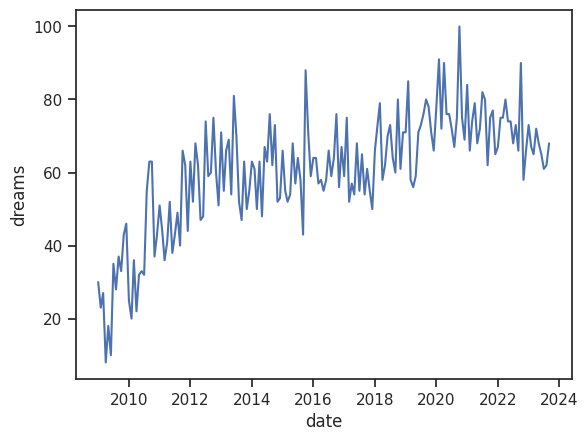

In [198]:
sns.lineplot(data=df_dreams, x='date', y='dreams');

In [199]:
dreams_min_max = df_dreams.groupby(['year', 'month'])['dreams'].sum().reset_index()
print("Year and month with the most dreams:\n", dreams_min_max[dreams_min_max['dreams']==dreams_min_max['dreams'].max()], "\n")
print("Year and month with the least dreams:\n", dreams_min_max[dreams_min_max['dreams']==dreams_min_max['dreams'].min()])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Year and month with the most dreams:
      year  month  dreams
141  2020     10     100 

Year and month with the least dreams:
    year  month  dreams
3  2009      4       8


In [200]:
dreams_monthly = df_dreams[['month', 'dreams']].groupby('month')['dreams'].sum().reset_index()
dreams_monthly

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,month,dreams
0,1,931
1,2,906
2,3,867
3,4,869
4,5,835
5,6,888
6,7,931
7,8,923
8,9,881
9,10,1021


#The dataset is pretty simple so let's look at some interesting ways to present it

In [201]:
# how many dream counts are fibonacci numbers?
fibonacci_15 = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

df_dreams_fib = pd.DataFrame(columns=['date', 'year', 'month', 'dreams'], index=df_dreams.index)
lst_dreams_fib = []

# for i in df_dreams.index:
#   if df_dreams['dreams'][i] in fibonacci_15:
#     lst_dreams_fib.append({'date':df_dreams.date[i], 'year': df_dreams.year[i], 'month':df_dreams.month[i], 'dreams':df_dreams.dreams[i]})

# df_dreams_fib.append(lst_dreams_fib)
# df_dreams_fib

for i in df_dreams.index:
  if df_dreams['dreams'][i] in fibonacci_15:
    # lst_dreams_fib.append({'date':df_dreams.date[i], 'year': df_dreams.year[i], 'month':df_dreams.month[i], 'dreams':df_dreams.dreams[i]})
    df_dreams_fib.date[i] = df_dreams.date[i]
    df_dreams_fib.year[i] = df_dreams.year[i]
    df_dreams_fib.month[i] = df_dreams.month[i]
    df_dreams_fib.dreams[i] = df_dreams.dreams[i]

df_dreams_fib = df_dreams_fib.dropna()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

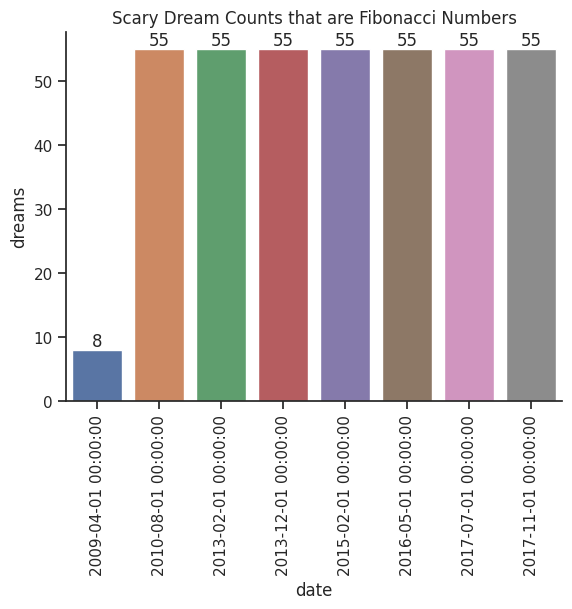

In [202]:
plt_fib = sns.barplot(data=df_dreams_fib, x='date', y='dreams')
plt_fib.set_xticklabels(df_dreams_fib.date, rotation=90)
plt_fib.set(title='Scary Dream Counts that are Fibonacci Numbers')
for label in plt_fib.containers:
  plt_fib.bar_label(label,)
sns.despine()

#Now that we have some interesting groupings and findings, let's create a 4-plot visual

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

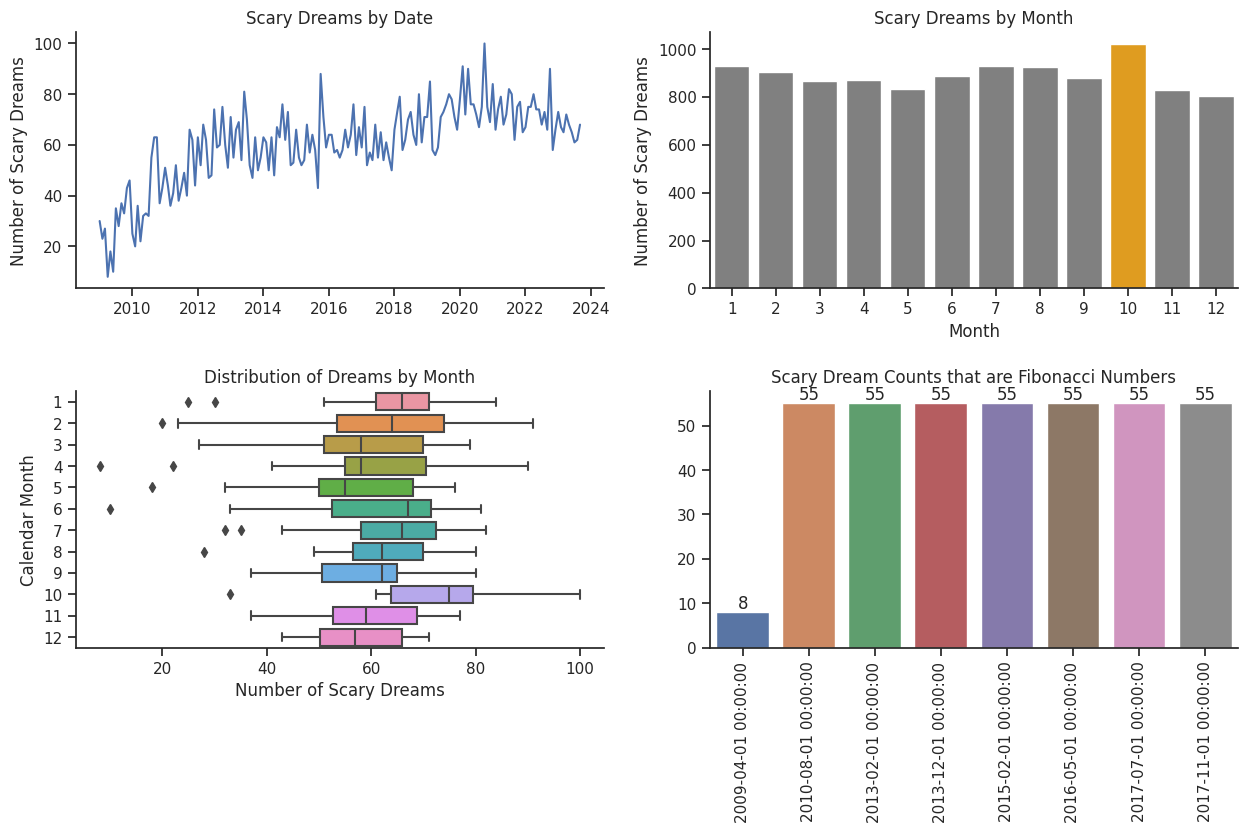

In [203]:
fig, axes = plt.subplots(2, 2, figsize=(15,8))
plt.subplots_adjust(hspace = 0.4)

sns.lineplot(data=df_dreams, x='date', y='dreams', ax=axes[0,0]).set(title='Scary Dreams by Date', xlabel=None, ylabel ='Number of Scary Dreams')
sns.barplot(data=dreams_monthly, x='month', y='dreams', ax=axes[0,1], palette=['grey' if (x < max(dreams_monthly['dreams'])) else 'orange' for x in dreams_monthly['dreams']]).set(title='Scary Dreams by Month', xlabel='Month', ylabel='Number of Scary Dreams');
sns.boxplot(data=df_dreams, x='dreams', y='month', orient='h', ax=axes[1,0]).set(title='Distribution of Dreams by Month', xlabel='Number of Scary Dreams', ylabel='Calendar Month')
plt_fib = sns.barplot(data=df_dreams_fib, x='date', y='dreams', ax=axes[1,1])
plt_fib.set_xticklabels(df_dreams_fib.date, rotation=90)
plt_fib.set(title='Scary Dream Counts that are Fibonacci Numbers', xlabel=None, ylabel=None)
for label in plt_fib.containers:
  plt_fib.bar_label(label,)
sns.despine()
fig.show()

#Let's create a facet grid to show the data, since we have two time-based columns - year and month

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

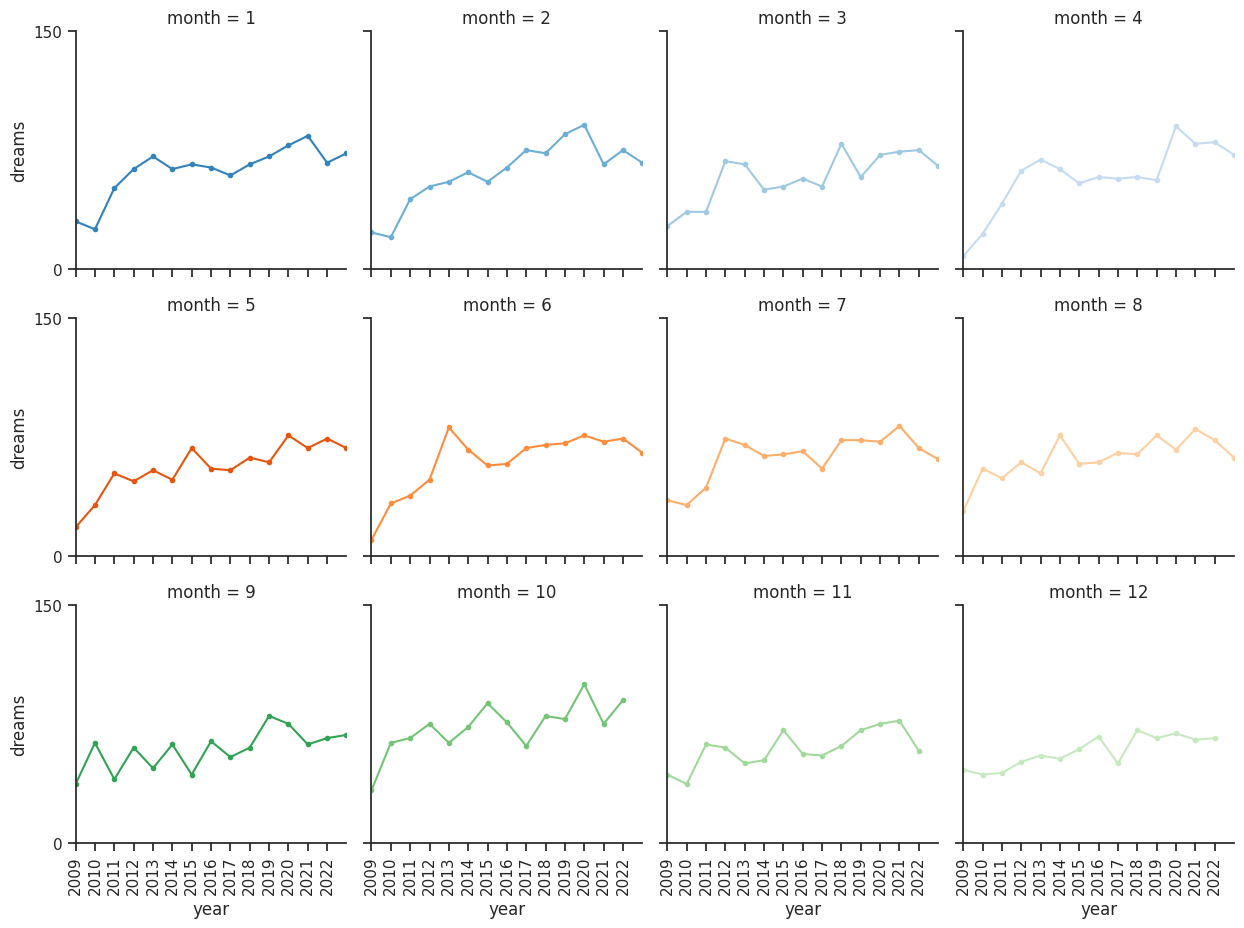

In [221]:
sns.set_theme(style="ticks")

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df_dreams, col="month", hue="month", palette="tab20c", col_wrap=4, height=3.15)

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "year", "dreams", marker=".")

# Adjust the tick positions and labels
#
grid.set(xticks=np.arange(2009,2023,1), yticks=[0,150], xlim=(2009,2023), ylim=(0, 150))
grid.set_xticklabels(np.arange(2009,2023,1), rotation=90)

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

#From the visuals it doesn't look like simple linear regression will be able to accurately predict the future number of dreams but let's give it a try anyway

In [205]:
# start prediction work
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as stats

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [206]:
df_dreams.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,date,year,month,dreams
0,2009-01-01,2009,1,30
1,2009-02-01,2009,2,23
2,2009-03-01,2009,3,27
3,2009-04-01,2009,4,8
4,2009-05-01,2009,5,18


In [207]:
# turn the date into a continuous variable
df_dreams['date_cont'] = df_dreams.date.astype(int)/10**11
df_dreams

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,date,year,month,dreams,date_cont
0,2009-01-01,2009,1,30,12307680.0
1,2009-02-01,2009,2,23,12334464.0
2,2009-03-01,2009,3,27,12358656.0
3,2009-04-01,2009,4,8,12385440.0
4,2009-05-01,2009,5,18,12411360.0
...,...,...,...,...,...
172,2023-05-01,2023,5,68,16828992.0
173,2023-06-01,2023,6,65,16855776.0
174,2023-07-01,2023,7,61,16881696.0
175,2023-08-01,2023,8,62,16908480.0


In [208]:
# create the training and testing datasets
dreams_train_df = df_dreams.sample(frac=0.8, random_state=42)
dreams_test_df = df_dreams.drop(dreams_train_df.index)
print("training data shape: ", dreams_train_df.shape)
print("testing data shape: ", dreams_test_df.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

training data shape:  (142, 5)
testing data shape:  (35, 5)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

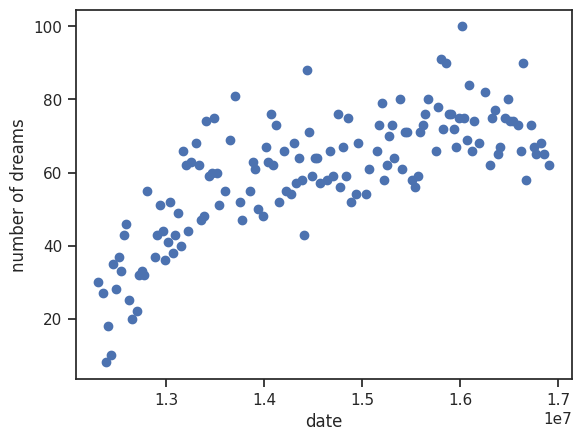

In [209]:
# create a basic plot of the data
plt.scatter(dreams_train_df.date_cont, dreams_train_df.dreams)
plt.xlabel('date')
plt.ylabel('number of dreams')
plt.show()

In [210]:
# set the variables for the Ordinary Least Squares process
x_train = dreams_train_df.date_cont
y_train = dreams_train_df.dreams

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [211]:
# run the OLS on our data
model_dreams = stats.OLS(y_train, x_train)
results_dreams = model_dreams.fit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [212]:
# view the results of the OLS regression
print(results_dreams.summary())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                                 OLS Regression Results                                
Dep. Variable:                 dreams   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              3021.
Date:                Wed, 18 Oct 2023   Prob (F-statistic):                    4.02e-97
Time:                        23:59:04   Log-Likelihood:                         -567.21
No. Observations:                 142   AIC:                                      1136.
Df Residuals:                     141   BIC:                                      1139.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [213]:
date_coeff = results_dreams.params[0]
ssr_dreams = results_dreams.ssr

print("date coefficient: ", date_coeff)
print("sum of square residuals: ", ssr_dreams)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

date coefficient:  4.156352264869282e-06
sum of square residuals:  24509.681202932035


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

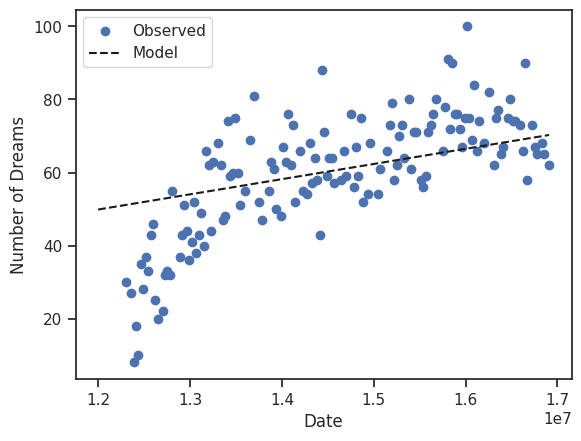

In [214]:
# plot the model's line against the observed data
x_synthetic = np.linspace(12000000,dreams_train_df.date_cont.max(), 50)
y_pred_dreams = date_coeff*x_synthetic + 0 #intercept is zero
plt.scatter(dreams_train_df.date_cont, dreams_train_df.dreams, label='Observed')
plt.plot(x_synthetic, y_pred_dreams, color='k', ls='--', label='Model')
plt.xlabel('Date')
plt.ylabel('Number of Dreams')
plt.legend()
plt.show()

#The basic OLS linear regression is not useful based on the visual above,
but let's run the model against the testing data

In [215]:
x_test = dreams_test_df.date_cont
y_test = dreams_test_df.dreams

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [216]:
test_predictions = results_dreams.predict(x_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

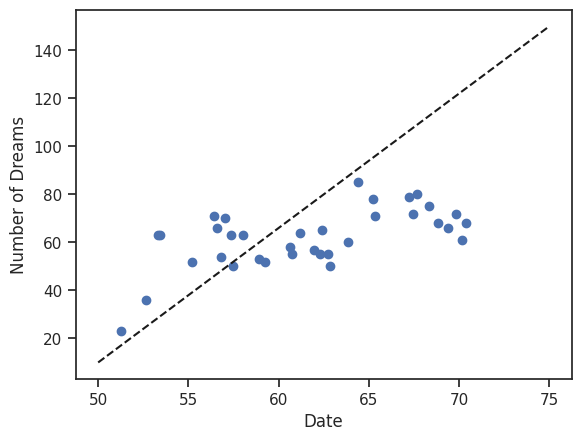

In [219]:
plt.scatter(test_predictions, y_test)
plt.plot([50, 75], [10, 150], c='k', ls='--')
plt.xlabel('Date')
plt.ylabel('Number of Dreams')
plt.show();